In [15]:
from os.path import join
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from os.path import dirname, abspath,join
import sys
#sys.path.append(dirname(dirname(abspath(__file__))))
sys.path.append("../")
from process_pipeline.config import get_folders

DATA_DIR,INPUT_DIR,OUTPUT_DIR,INTERMEDIATE_DIR = get_folders(key="local")

In [16]:
id_label = "id"
design_label = "SAP"
version_label = "Version"
batch_label = "WA"
step_label = "PaPos"
variable_label = "Variable"
process_label = "Process"
given_label = "Given"

In [17]:
X_np = np.load(join(OUTPUT_DIR,"X_np.npy"))
Y_np = np.load(join(OUTPUT_DIR,"Y_np.npy"))

In [39]:
df_plasma = pd.read_csv(join(INPUT_DIR,"plasma.csv"),sep=";", header=11)
df_plasma["Position"].unique()

C:\Users\ScipioneFrancesco\AppData\Local\Temp\ipykernel_12352\663623815.py:1: DtypeWarning: Columns (24,36,58,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_plasma = pd.read_csv(join(INPUT_DIR,"plasma.csv"),sep=";", header=11)


array([ nan, 460., 250.,  60., 480., 270., 260.])

In [18]:
df_pc = pd.read_csv(join(INTERMEDIATE_DIR,"x_prochain.csv"))
df_pc.head()


,Unnamed: 0,Value,Time,Variable,Process,WA,PaPos,Version,SAP,Pos,id,Position
0,0,0.033642,1/7/22 2:31 AM,las_22,Laser,CTBV,40,C,426816,1,41453A,0
1,1,0.033122,1/7/22 2:31 AM,las_23,Laser,CTBV,40,C,426816,1,41453A,1
2,2,0.495268,1/7/22 2:31 AM,las_28,Laser,CTBV,40,C,426816,1,41453A,2
3,3,0.027895,1/7/22 2:31 AM,las_29,Laser,CTBV,40,C,426816,1,41453A,3
4,4,0.005162,1/7/22 2:31 AM,las_30,Laser,CTBV,40,C,426816,1,41453A,4


In [19]:
df_pc[["PaPos","Process"]].sort_values(by="PaPos").drop_duplicates(ignore_index=True)

,PaPos,Process
0,40,Laser
1,70,Galvanic
2,80,Galvanic
3,90,Galvanic
4,100,Laser
5,180,Multibond
6,200,Multibond
7,230,Laser
8,240,Laser
9,250,Laser


C:\Users\ScipioneFrancesco\AppData\Local\Temp\ipykernel_12352\1111894469.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot["Time"] = pd.to_datetime(df_plot["Time"]).round("30D")


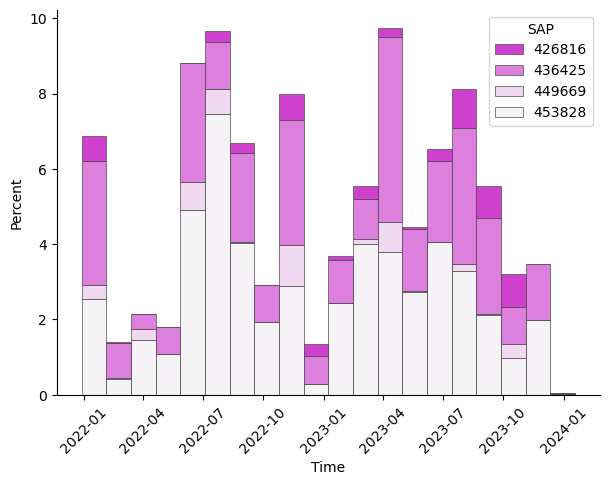

In [22]:
f, ax = plt.subplots(figsize=(7, 5))

sns.despine(f)

df_plot = df_pc.copy()
df_plot["Time"] = pd.to_datetime(df_plot["Time"]).round("30D")
df_plot = df_plot.sort_values("Time")

sns.histplot(data=df_plot, x="Time", hue="SAP", multiple="stack",
             palette="light:m_r",edgecolor=".3",linewidth=.5,bins=20,stat="percent", ax = ax)

plt.xticks(rotation=45)
plt.show()

In [26]:
processes= df_pc["Process"].unique()
designs = df_pc[design_label].unique()
processes

array(['Laser', 'Galvanic', 'Multibond', 'Microetch'], dtype=object)

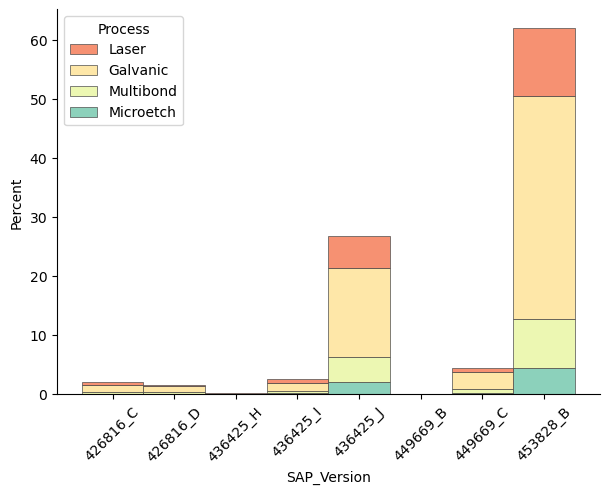

In [24]:
df_plot = df_lev.copy()
df_plot["SAP"] = df_plot["SAP"].apply(lambda x: str(x))
df_plot["SAP_Version"] = df_plot["SAP"]+"_"+df_plot["Version"]

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data = df_plot,
    x="SAP_Version", 
    hue="Process", 
    hue_order=processes,
    multiple="stack",
    palette="Spectral",
    edgecolor=".3",
    linewidth=.5,
    stat="percent")

plt.xticks(rotation=45)
plt.show()

# Data Leveling
## Before Leveling

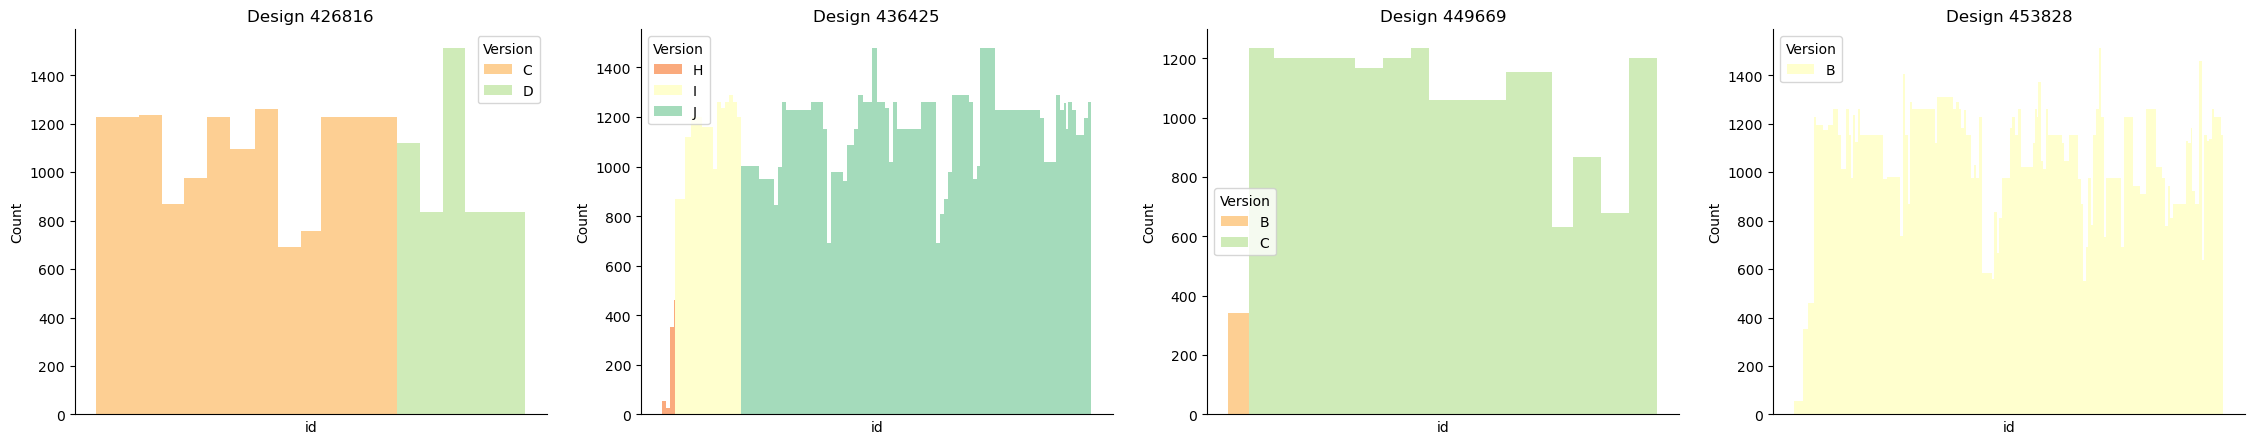

In [27]:
multi = designs
sub_label = design_label


f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)

for i, sub_class in enumerate(multi):
        
    sns.histplot(
        data = df_pc.set_index(design_label).loc[sub_class],
        x=id_label, hue=version_label, multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Design {sub_class}")

## After Leveling

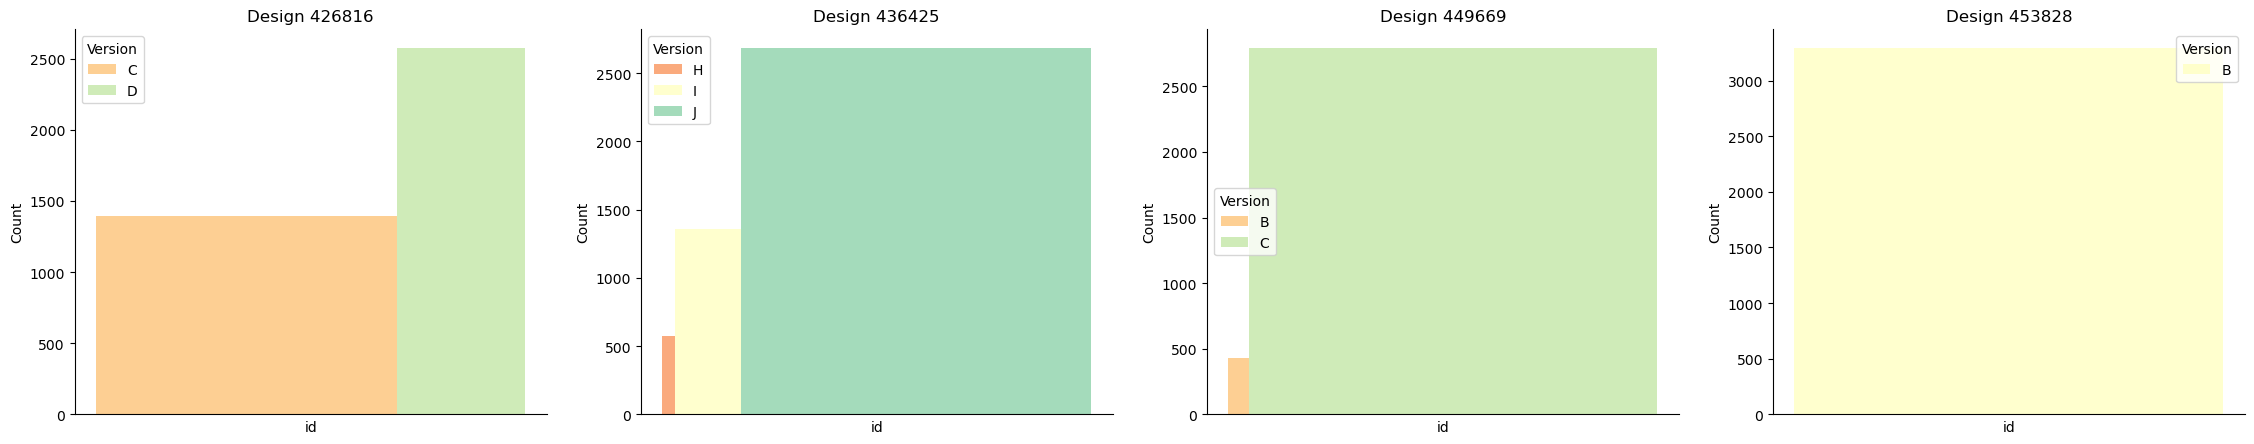

In [28]:
f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)

for i, sub_class in enumerate(multi):
        
    sns.histplot(
        data = df_lev.set_index(design_label).loc[sub_class],
        x=id_label, hue=version_label, multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Design {sub_class}")

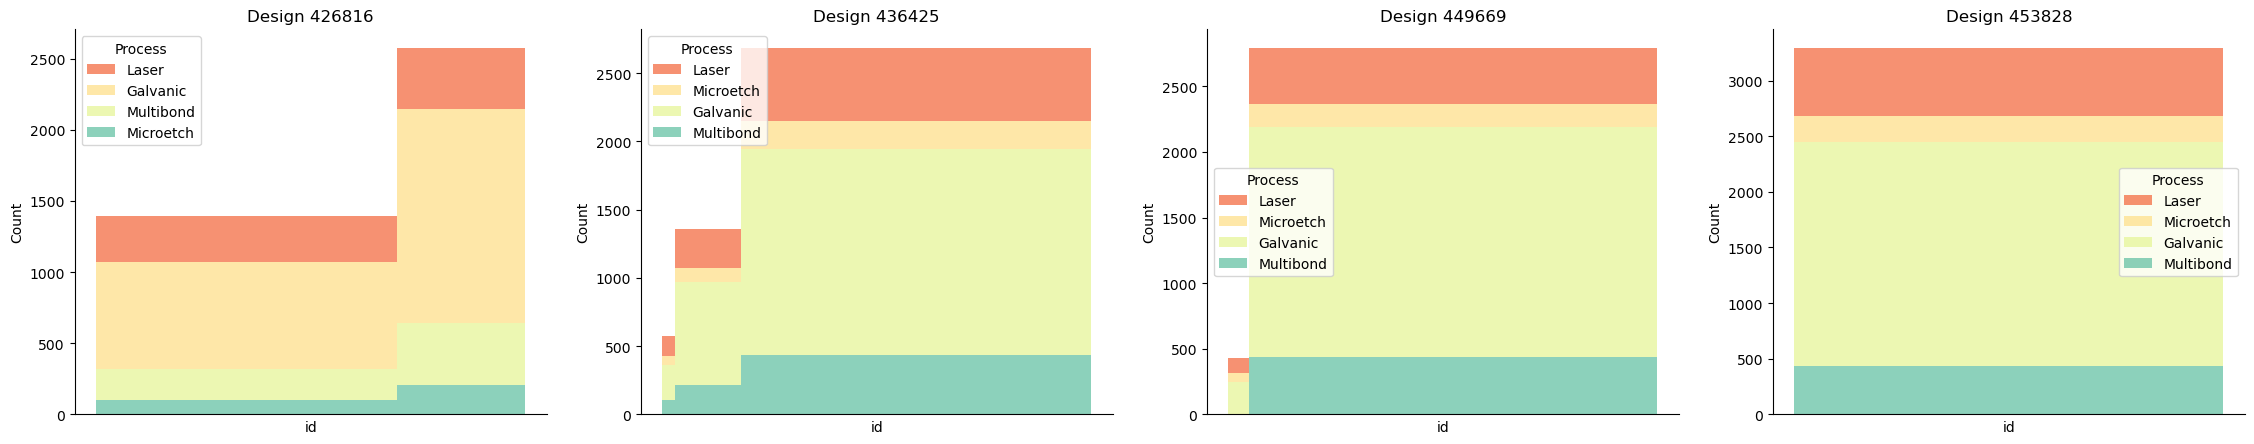

In [35]:
f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)



for i, sub_class in enumerate(multi):
    
    data = df_lev.set_index(design_label).loc[sub_class]
    
    sns.histplot(
        data = data,
        x=id_label, hue=process_label, multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Design {sub_class}")

## Lot's of voids

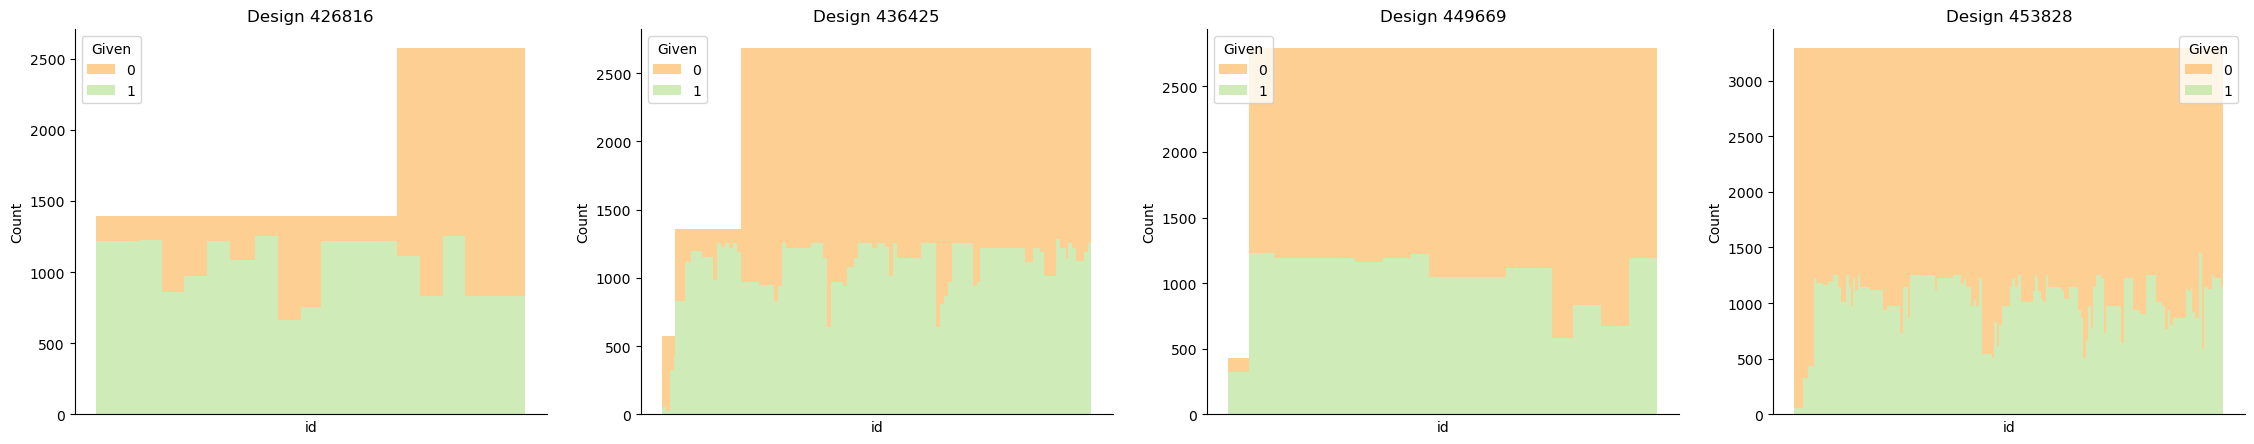

In [ ]:
f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)

for i, sub_class in enumerate(multi):
        
    sns.histplot(
        data = df_lev.set_index(design_label).loc[sub_class],
        x=id_label, hue=given_label, multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Design {sub_class}")

## Can we take away some variables?
A part from some exceptions where the variables are completely missing, most of them are in some data and other don't

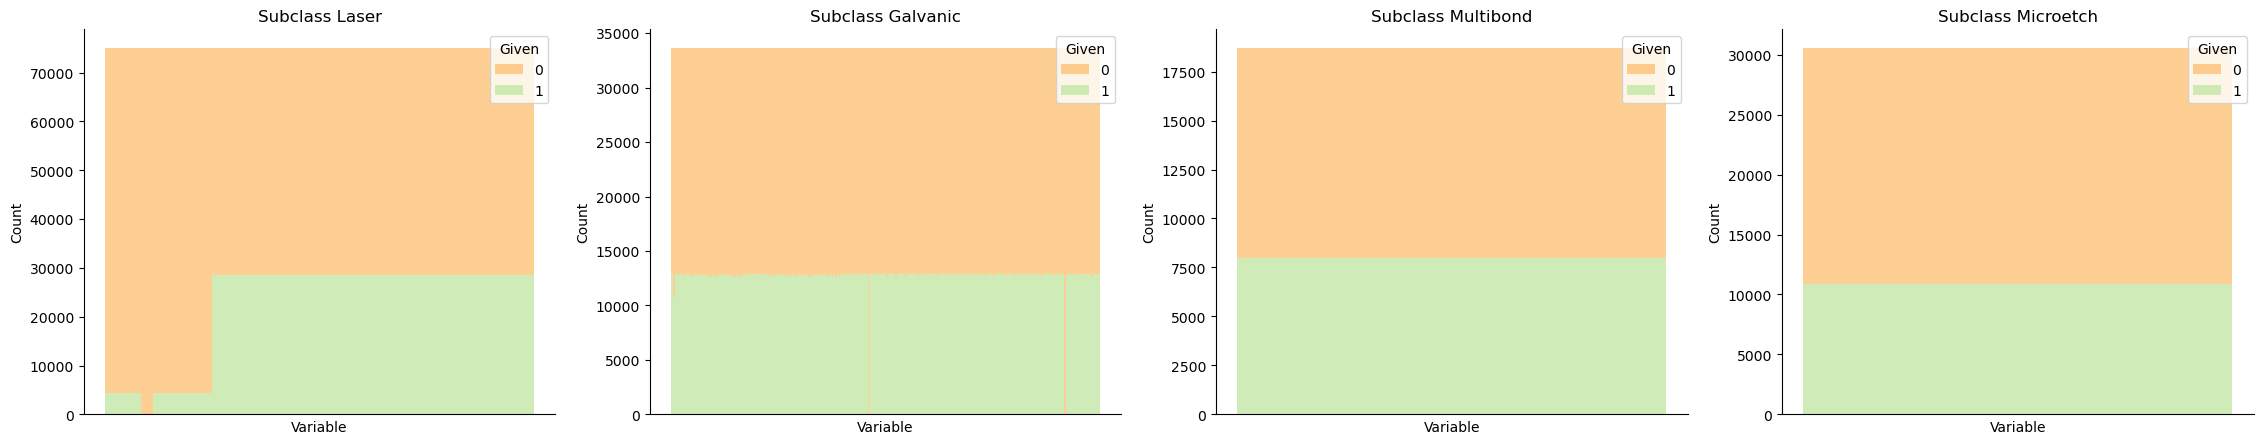

In [ ]:
multi = processes
sub_label = process_label

f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)

for i, sub_class in enumerate(multi):
        
    sns.histplot(
        data = df_lev.set_index(sub_label).loc[sub_class],
        x=variable_label, hue=given_label, multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Subclass {sub_class}")